# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 строк.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
#необходимые библиотеки
install.packages("corrplot")
install.packages("EnvStats")
library(EnvStats)
library(ggplot2)
library(corrplot)
library(dplyr)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#импортируем нужную таблицу и фильтруем ее
music_df <- read.csv('https://raw.githubusercontent.com/daryabaldina1702/vim/main/lab2/music_genre.csv')
music_df <- music_df[music_df$duration_ms > 0,]
music_df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
2,46652,Thievery Corporation,The Shining Path,31,1.27e-02,0.622,218293,0.890,9.50e-01,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.5310,Electronic
3,30097,Dillon Francis,Hurricane,28,3.06e-03,0.620,215613,0.755,1.18e-02,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.3330,Electronic
4,62177,Dubloadz,Nitro,34,2.54e-02,0.774,166875,0.700,2.53e-03,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.2700,Electronic
5,24907,What So Not,Divide & Conquer,32,4.65e-03,0.638,222369,0.587,9.09e-01,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.3230,Electronic
6,89064,Axel Boman,Hello,47,5.23e-03,0.755,519468,0.731,8.54e-01,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
7,43760,Jordan Comolli,Clash,46,2.89e-02,0.572,214408,0.803,7.74e-06,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.2300,Electronic
8,30738,Hraach,Delirio,43,2.97e-02,0.809,416132,0.706,9.03e-01,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.7610,Electronic
9,84950,Kayzo,NEVER ALONE,39,2.99e-03,0.509,292800,0.921,2.76e-04,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.2730,Electronic
10,56950,Shlump,Lazer Beam,22,9.34e-03,0.578,204800,0.731,1.12e-02,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.2030,Electronic


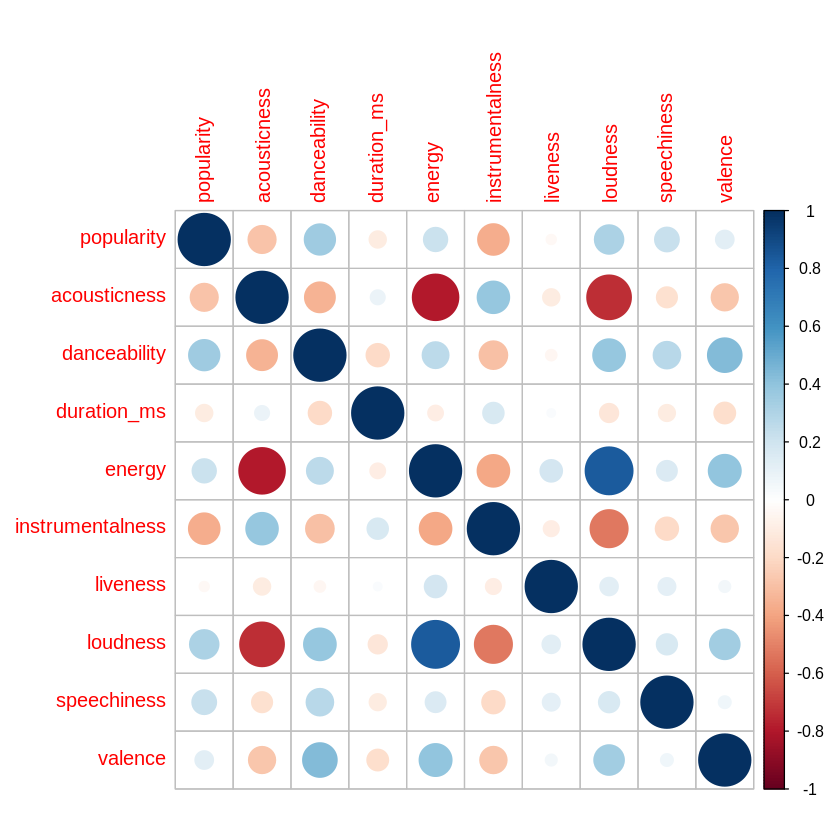

In [ ]:
cor_data <- music_df[ ,-c(1,2,3,10,13,15,16,18)]
corrplot(cor(cor_data, use = "complete.obs"))

# Вывод


1.  Лучше всего коррелируют между собой loudness и energy, valence и danceability, valence и energy.
2.   Хуже всего коррелируют между собой loudness и acousticness, energy и acousticness, loudness и instrumentalness.


## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

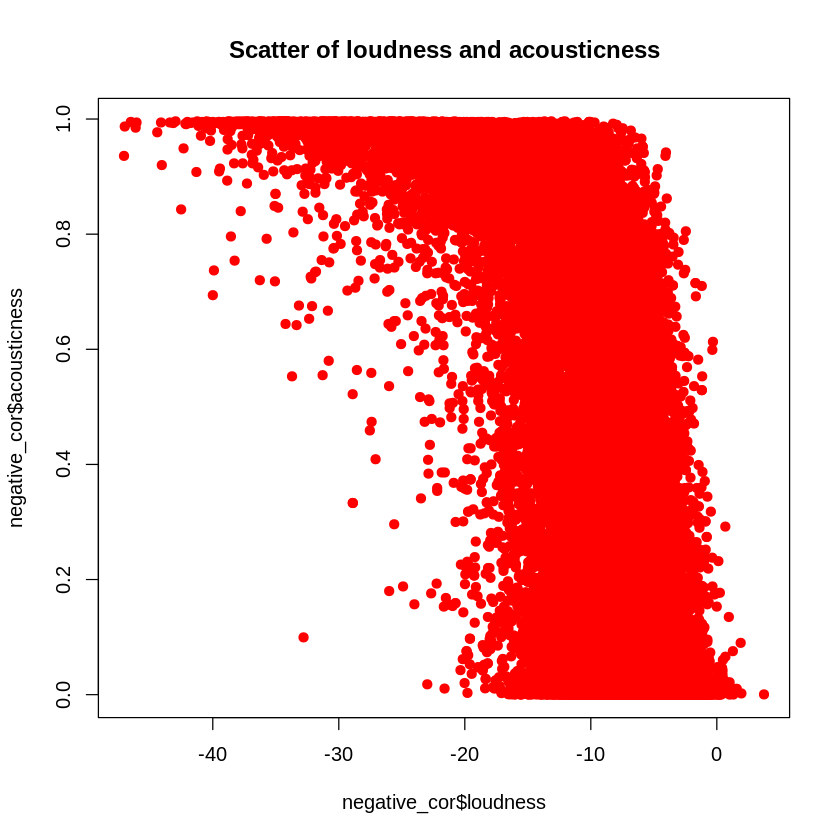

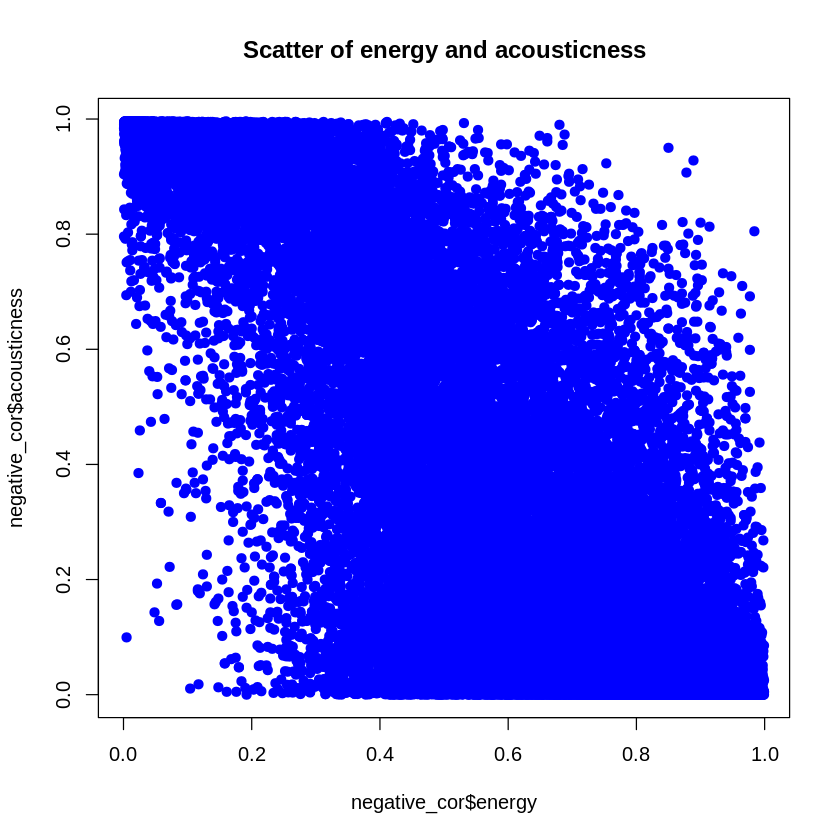

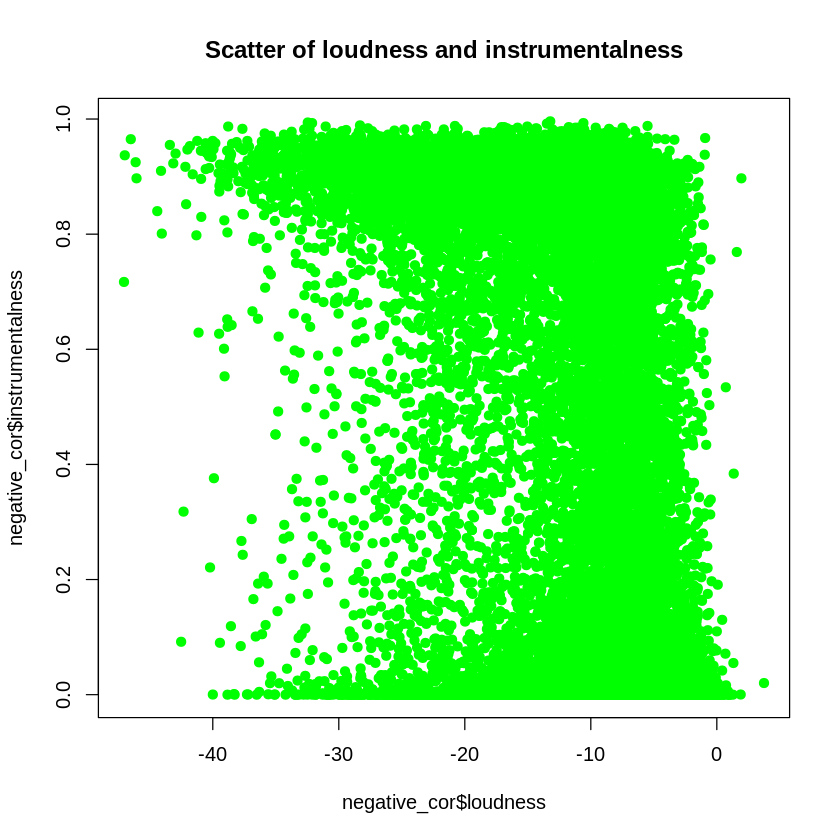

In [ ]:
negative_cor <- music_df[ , c(5,8,9,12)]
plot(negative_cor$loudness, negative_cor$acousticness, pch=19, col = 'red', main = 'Scatter of loudness and acousticness')
plot(negative_cor$energy, negative_cor$acousticness, pch=19, col='blue', main = 'Scatter of energy and acousticness')
plot(negative_cor$loudness, negative_cor$instrumentalness, pch=19, col='green', main = 'Scatter of loudness and instrumentalness')

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

In [ ]:
#распределние треков по жанрам
tracks <- music_df[ ,c(3,18)]
genre_distribution <- tracks %>% group_by(music_genre) %>% count(music_genre)
genre_distribution <- genre_distribution[-11,]
genre_distribution


music_genre,n
<chr>,<int>
Alternative,4509
Anime,4527
Blues,4517
Classical,4489
Country,4508
Electronic,4517
Hip-Hop,4510
Jazz,4503
Rap,4488


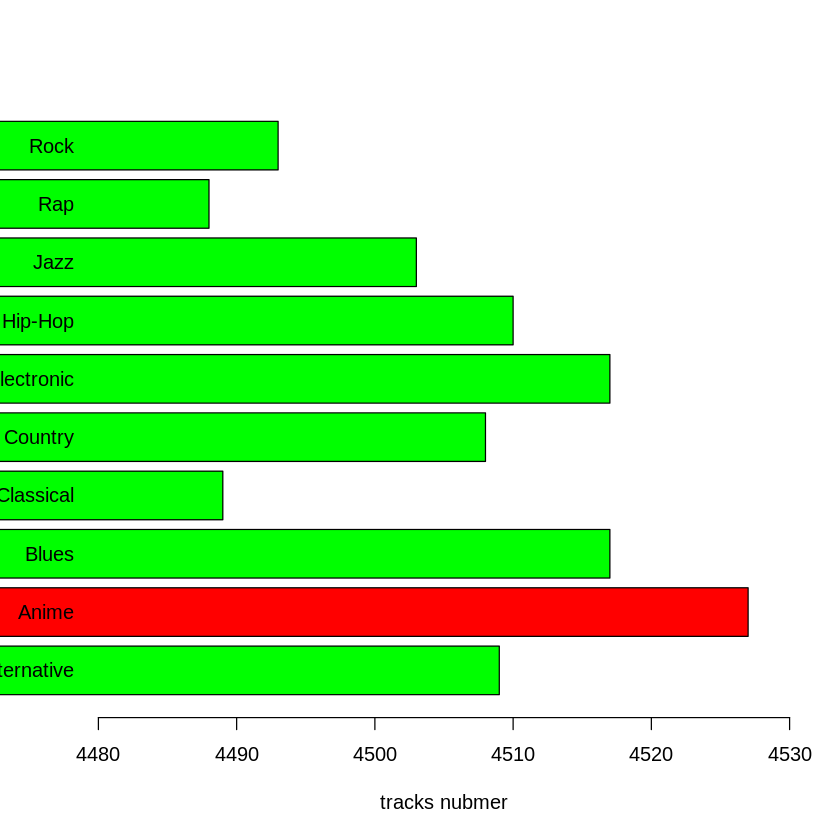

In [ ]:
#отбор нужных цветов
palette <- data.frame()
for (x in genre_distribution$n){
  if (x < max(genre_distribution$n)){
    palette<-rbind(palette, 'green') 
} else{ 
    palette <- rbind(palette,'red')
}
}
col1 <- palette[c(1,2,3,4,5,6,7,8,9,10),]
#построение диаграммы 
barplot(height=genre_distribution$n, names=genre_distribution$music_genre, 
        xlab="tracks nubmer",
        xlim = c(4480, 4530),
        col= col1,
        horiz=T, las=1
        )

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
#отбираем топ-3 жанра
genre <- music_df[,c(2,4,18)]
genre <- genre[genre$artist_name != 'empty_field',]
top_genre <- genre %>% group_by(music_genre) %>% summarise(popularity = sum(popularity))
top_genre <- top_genre[-c(11),]
top3_genre <-head(top_genre[order(top_genre$popularity, decreasing=TRUE),], n = 3)
top3_genre

music_genre,popularity
<chr>,<dbl>
Rap,257239
Rock,254649
Hip-Hop,250692


In [ ]:
#топ-3 исполнителя для Rock
genre_rock <- genre[genre$music_genre == 'Rock',]
top_artists <- genre_rock %>% group_by(music_genre, artist_name) %>% summarise(popularity = sum(popularity))
top3_artists_rock <-head(top_artists[order(top_artists$popularity, decreasing=TRUE),], n = 3)
top3_artists_rock

`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,artist_name,popularity
<chr>,<chr>,<dbl>
Rock,The Beatles,4563
Rock,Queen,2411
Rock,Panic! At The Disco,2368


In [ ]:
#топ-3 исполнителя для Rap
genre_rap <- genre[genre$music_genre == 'Rap',]
top_artists <- genre_rap %>% group_by(music_genre, artist_name) %>% summarise(popularity = sum(popularity))
top3_artists_rap <-head(top_artists[order(top_artists$popularity, decreasing=TRUE),], n = 3)
top3_artists_rap

`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,artist_name,popularity
<chr>,<chr>,<dbl>
Rap,Drake,4770
Rap,Kanye West,3814
Rap,Eminem,3087


In [ ]:
#топ-3 исполнителя для Hip-Hop
genre_hip_hop <- genre[genre$music_genre == 'Hip-Hop',]
top_artists <- genre_hip_hop %>% group_by(music_genre, artist_name) %>% summarise(popularity = sum(popularity))
top3_artists_hip_hop <-head(top_artists[order(top_artists$popularity, decreasing=TRUE),], n = 3)
top3_artists_hip_hop

`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,artist_name,popularity
<chr>,<chr>,<dbl>
Hip-Hop,Eminem,5469
Hip-Hop,Drake,5252
Hip-Hop,Future,3679


In [ ]:
#получение объединенной таблицы
genre_df <- top3_artists_rock
new_row1 <- top3_artists_hip_hop[c(1,2,3),]
new_row2 <- top3_artists_rap[c(1,2,3),]
genre_df <- rbind(genre_df, new_row1)
genre_df <- rbind(genre_df, new_row2)
genre_df

music_genre,artist_name,popularity
<chr>,<chr>,<dbl>
Rock,The Beatles,4563
Rock,Queen,2411
Rock,Panic! At The Disco,2368
Hip-Hop,Eminem,5469
Hip-Hop,Drake,5252
Hip-Hop,Future,3679
Rap,Drake,4770
Rap,Kanye West,3814
Rap,Eminem,3087


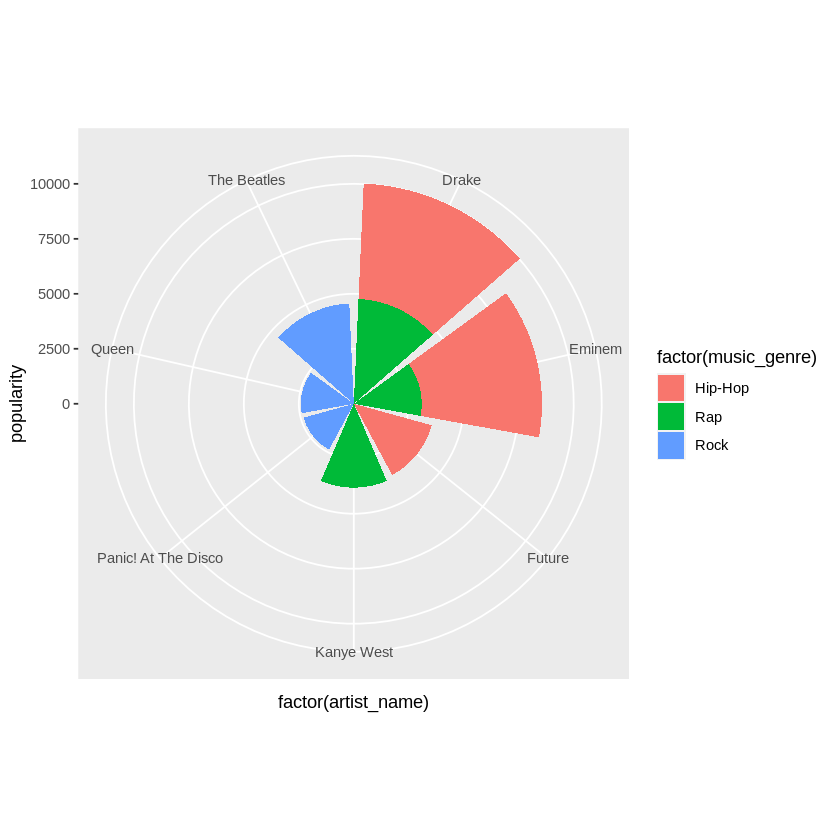

In [ ]:
ggplot(genre_df, aes(x = factor(artist_name), y = popularity, fill = factor(music_genre))) +
          geom_col()  +
          coord_polar("x")

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

In [ ]:
#таблица с популярностью жанров
top_genre[order(top_genre$popularity, decreasing=TRUE),]

music_genre,popularity
<chr>,<dbl>
Rap,257239
Rock,254649
Hip-Hop,250692
Alternative,214398
Country,198611
Jazz,176227
Electronic,164430
Blues,149062
Classical,124693


In [ ]:
#самый популярный - Rap, самый непопулярный - Anime
max_popular <- music_df[music_df$music_genre == 'Rap',]
min_popular <- music_df[music_df$music_genre == 'Anime',]
#оставляем только нужные колонки
max_popular <- max_popular[,-c(1,2,3,10,13,15,16,18)]
min_popular <- min_popular[,-c(1,2,3,10,13,15,16,18)]
max_popular <- max_popular %>% drop_na()
min_popular <- min_popular %>% drop_na()
#считаем средние значения по таблицам max и min
mean_max <- colMeans(max_popular)
mean_min <- colMeans(min_popular)
#таблица сo средними разницами
mean_table <- abs(mean_max-mean_min)
mean_table <- data.frame ('characteristics' = c('popularity', 'acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','valence'),difference = mean_table)
rownames(mean_table) <- 1:nrow(mean_table)
mean_table

,characteristics,difference
,<chr>,<dbl>
1,popularity,3.631034e+01
2,acousticness,1.147976e-01
3,danceability,2.240119e-01
4,duration_ms,1.177866e+04
5,energy,1.446711e-02
6,instrumentalness,2.675788e-01
7,liveness,5.842427e-03
8,loudness,1.282758e+00
9,speechiness,1.227714e-01


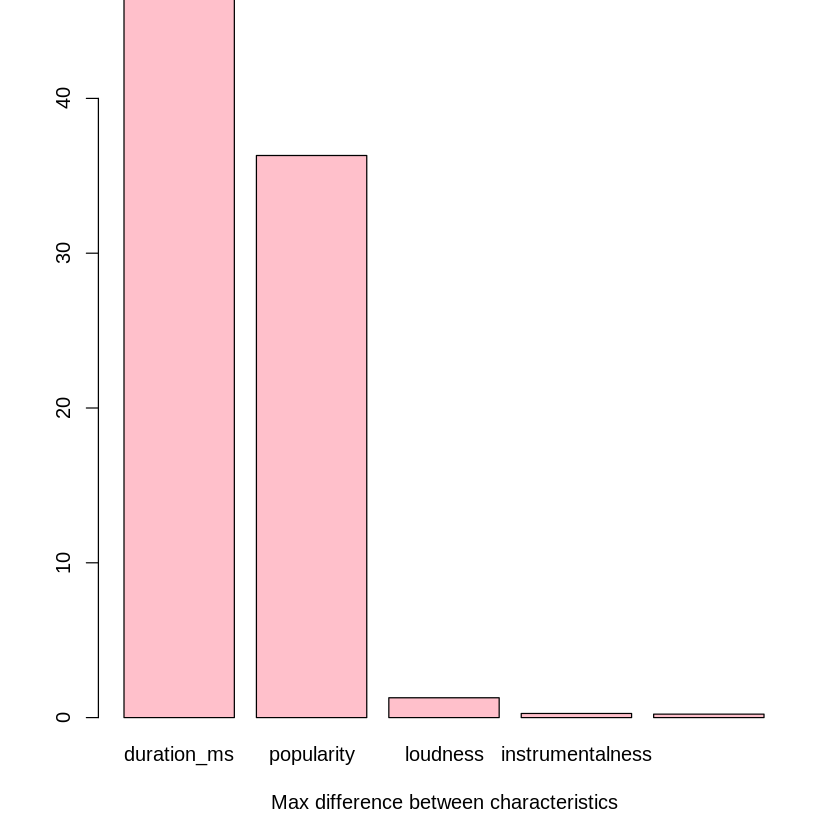

In [ ]:
#для максимума 
max_table <- head(mean_table[order(mean_table$difference, decreasing=TRUE),],5)
barplot(height=max_table$difference, names=max_table$characteristics, 
        xlab="Max difference between characteristics",
        ylim = c(0, 40),
        col= "pink"
        )

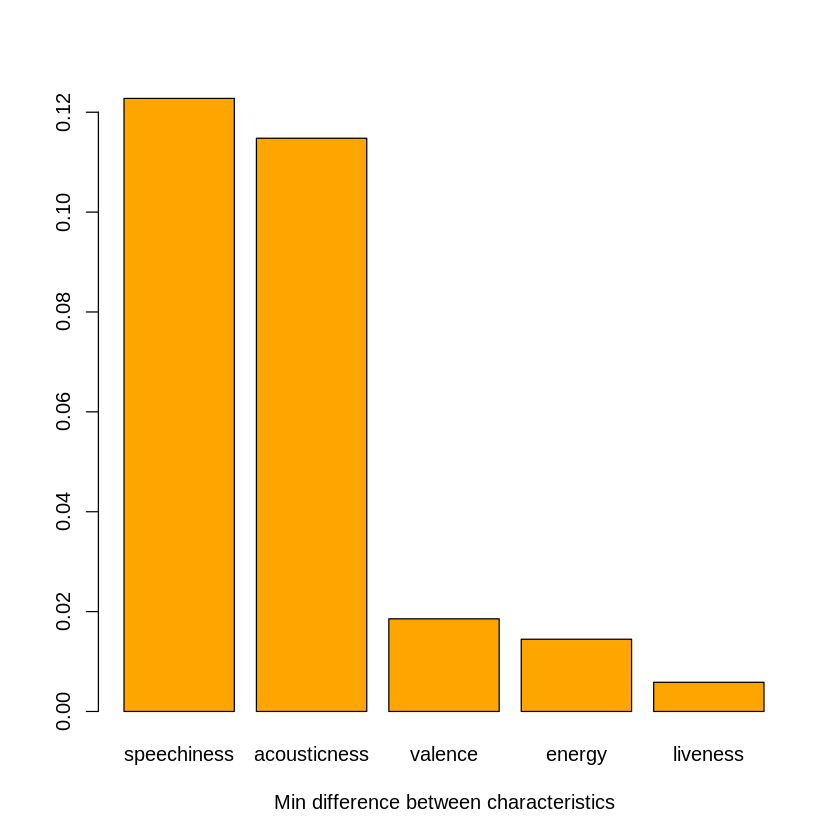

In [ ]:
min_table <- tail(mean_table[order(mean_table$difference, decreasing=TRUE),],5)
barplot(height=min_table$difference, names=min_table$characteristics, 
        xlab="Min difference between characteristics",
        col= "orange"
        )

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

In [ ]:
max_duration <- max(music_df$duration_ms, na.rm = TRUE)
mean_duration <- mean(music_df$duration_ms, na.rm = TRUE)
min_duration <- min(music_df$duration_ms, na.rm = TRUE)
median_duration <- median(music_df$duration_ms, na.rm = TRUE)

#добавление  категории 'длительность_трека'
fresh_music_df <- music_df
fresh_music_df['длительность_трека'] <- 0
for (i in 1:length(fresh_music_df$duration_ms)){
  if(is.na(fresh_music_df$duration_ms[i])) {fresh_music_df$duration_ms[i]=FALSE} 
  else if  (min_duration <= fresh_music_df$duration_ms[i]  & fresh_music_df$duration_ms[i] < median_duration) {
      fresh_music_df$длительность_трека[i] <- 'короткая'
  } else if (median_duration <= fresh_music_df$duration_ms[i] & fresh_music_df$duration_ms[i]<= mean_duration) {
     fresh_music_df$длительность_трека[i] <- 'средняя'
  } else{
     fresh_music_df$длительность_трека[i] <- 'длинная'
  }
}
fresh_music_df <- fresh_music_df[fresh_music_df$длительность_трека != 0,]
fresh_music_df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
2,46652,Thievery Corporation,The Shining Path,31,1.27e-02,0.622,218293,0.890,9.50e-01,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.5310,Electronic,короткая
3,30097,Dillon Francis,Hurricane,28,3.06e-03,0.620,215613,0.755,1.18e-02,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.3330,Electronic,короткая
4,62177,Dubloadz,Nitro,34,2.54e-02,0.774,166875,0.700,2.53e-03,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.2700,Electronic,короткая
5,24907,What So Not,Divide & Conquer,32,4.65e-03,0.638,222369,0.587,9.09e-01,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.3230,Electronic,короткая
6,89064,Axel Boman,Hello,47,5.23e-03,0.755,519468,0.731,8.54e-01,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic,длинная
7,43760,Jordan Comolli,Clash,46,2.89e-02,0.572,214408,0.803,7.74e-06,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.2300,Electronic,короткая
8,30738,Hraach,Delirio,43,2.97e-02,0.809,416132,0.706,9.03e-01,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.7610,Electronic,длинная
9,84950,Kayzo,NEVER ALONE,39,2.99e-03,0.509,292800,0.921,2.76e-04,F,0.1780,-3.175,Minor,0.2680,149.94799999999998,4-Apr,0.2730,Electronic,длинная
10,56950,Shlump,Lazer Beam,22,9.34e-03,0.578,204800,0.731,1.12e-02,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.2030,Electronic,короткая


In [ ]:
#отбор нужных столбцов для распределения
duration_table <- fresh_music_df[, c(12, 19)]
#duration_table
short_table <- duration_table[duration_table$длительность_трека == 'короткая',]
medium_table <- duration_table[duration_table$длительность_трека == 'средняя',]
long_table <-duration_table[duration_table$длительность_трека == 'длинная',]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



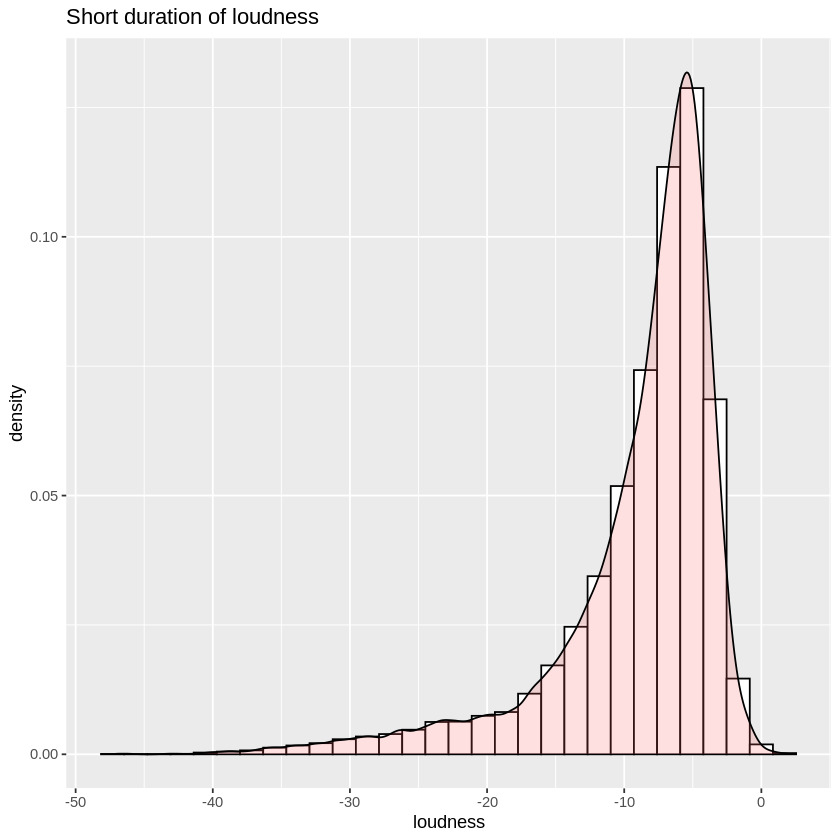

In [ ]:
ggplot(short_table, aes(x=loudness)) +
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="#FF6666")+
  labs(title="Short duration of loudness")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



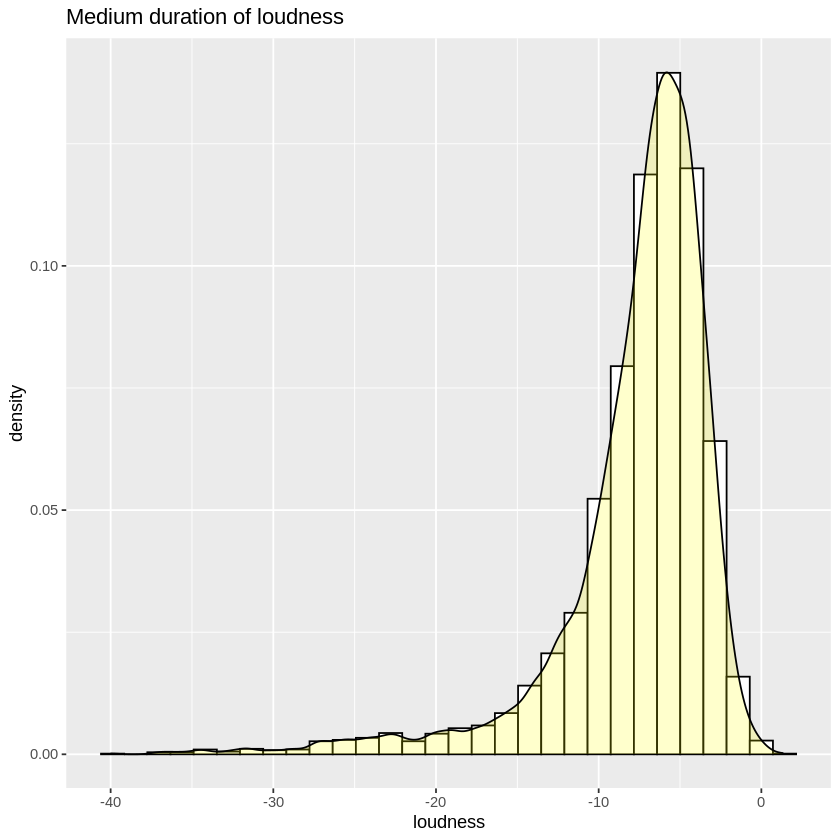

In [ ]:
ggplot(medium_table, aes(x=loudness)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="yellow")+
 labs(title="Medium duration of loudness")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



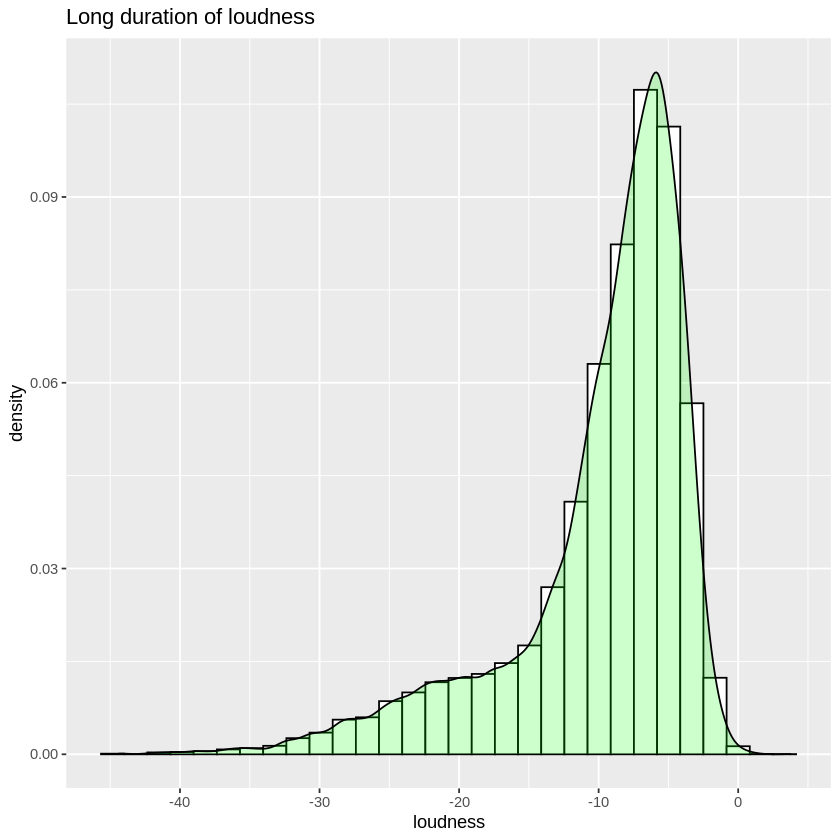

In [ ]:
ggplot(long_table, aes(x=loudness)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="green")+
labs(title="Long duration of loudness")

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

In [ ]:
#отбор нужных столбцов
genre_popularity <- music_df[, c(3, 4, 18)]
genre_popularity

,track_name,popularity,music_genre
,<chr>,<dbl>,<chr>
2,The Shining Path,31,Electronic
3,Hurricane,28,Electronic
4,Nitro,34,Electronic
5,Divide & Conquer,32,Electronic
6,Hello,47,Electronic
7,Clash,46,Electronic
8,Delirio,43,Electronic
9,NEVER ALONE,39,Electronic
10,Lazer Beam,22,Electronic


In [ ]:
#группируем популярность по жанрам и трекам
genre_popularity <- genre_popularity %>% group_by(music_genre, track_name) %>% summarise(popularity = sum(popularity))
genre_popularity <- genre_popularity[-43847,]
genre_popularity

`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


music_genre,track_name,popularity
<chr>,<chr>,<dbl>
Alternative,¿Qué Tiene?,58
Alternative,'Til the City's On Fire,40
Alternative,'Til We Die,50
Alternative,"""Blue Flame"" (Interlude)",7
Alternative,"""sometimes you meet the right people at the wrong times""",43
Alternative,(Joe Gets Kicked Out of School for Using) Drugs With Friends (But Says This Isn't a Problem),49
Alternative,(Not) The Love Of My Life,46
Alternative,*Sobs Quietly*,48
Alternative,#1 Crush,47


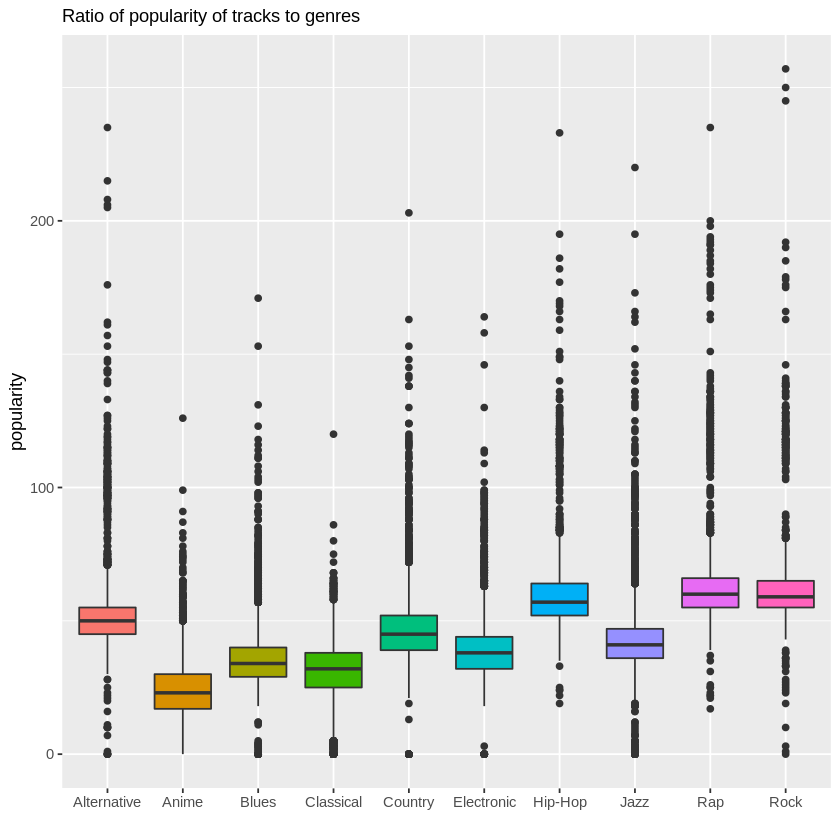

In [ ]:
ggplot(genre_popularity, aes(x=music_genre, y=popularity, fill = music_genre)) +
    geom_boxplot() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Ratio of popularity of tracks to genres") +
    xlab("")

# Вывод:
По большей популряности между собой похожи жанры Hip-Hop, Rap, Alternative, Rock. 


Также похожи между собой Electronic, Jazz и Blues

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
#необходимая таблица
track_lasting <- fresh_music_df[, c(3,19)]
track_lasting

,track_name,длительность_трека
,<chr>,<chr>
2,The Shining Path,короткая
3,Hurricane,короткая
4,Nitro,короткая
5,Divide & Conquer,короткая
6,Hello,длинная
7,Clash,короткая
8,Delirio,длинная
9,NEVER ALONE,длинная
10,Lazer Beam,короткая


In [ ]:
pie_table <- track_lasting %>% group_by(длительность_трека) %>% count(длительность_трека)


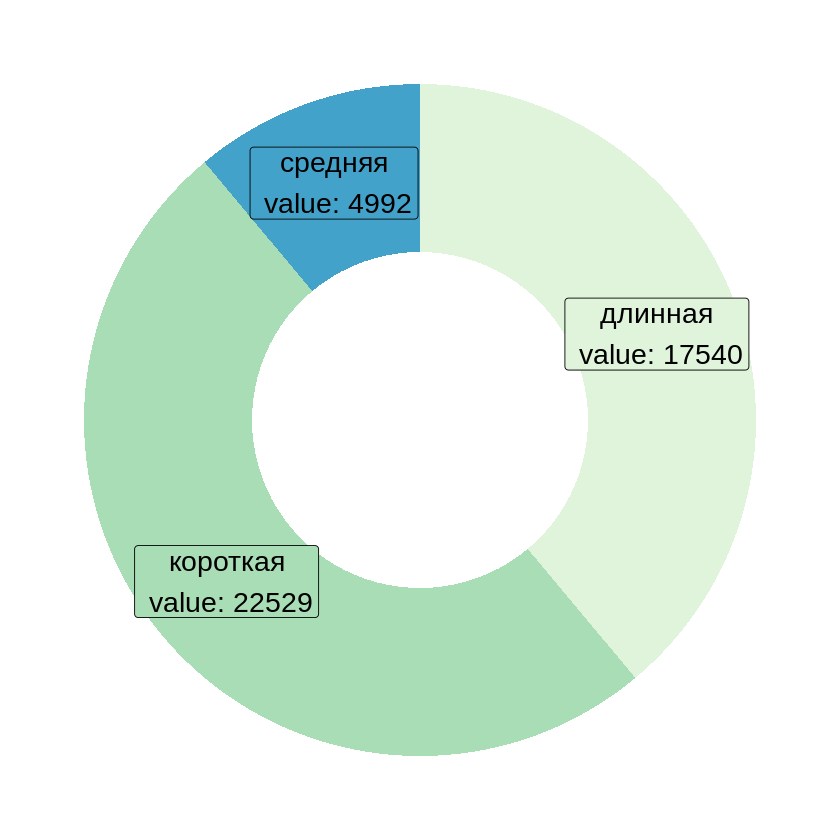

In [ ]:

pie_table$fraction = pie_table$n/sum(pie_table$n)

pie_table$ymax = cumsum(pie_table$fraction)

pie_table$ymin = c(0, head(pie_table$ymax, n=-1))

pie_table$labelPosition <- (pie_table$ymax + pie_table$ymin) / 2

pie_table$label <- paste0(pie_table$длительность_трека, "\n value: ", pie_table$n)

ggplot(pie_table, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=длительность_трека)) +
  geom_rect() +
  geom_label( x=3.5, aes(y=labelPosition, label=label), size=6) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none") 